# 関数近似

pythonのライブラリ利用演習を兼ねて、初歩的な関数近似と、利用上の注意について述べる。

特に、自然科学における利用とデータサイエンス的な観点との差異にも述べる。

<div style="text-align: right;">
    <a href="function_fitting.ipynb">このページのオリジナルのipynbファイル</a><br/>
    <a href="index.html">ホームへ戻る To homepage</a>
</div>

## データの準備

2つの値の組の$n$個のデータがあるとする。$(x_1,y_1),\ (x_2, y_2),\ \cdots,\ (x_n,y_n)$

ここでは、$x$と$y$の関係が何かある関数$y=f(x)$で表されるとしてそれを探る問題を考えてみる。

準備として仮想的なデータを用意する。

$\sin x$の値に、ガウシアンノイズを載せたデータを返す関数make_data_by_sin_gaussian()を以下のように作成する。


In [1]:
import numpy as np
import random

def make_data_by_sin_gaussian(x):
    # y=sin (x)を計算し、ガウス分布に従うノイズを加える
    y = np.sin(x) # argument is a 1-d array -> returned variable is a 1-d array 
    e = [random.gauss(0, 0.5) for i in range(len(y))] # 内包表記 (generate random numbers using list comprehension)
    # e = np.random.randn(len(x))*0.2
    y += e
    return y

In [2]:
# データ数
n_tr = 10
x = np.linspace(0., np.pi*2., n_tr) # リスト 0から２πまでをn_tr等分した値を一次元配列

In [3]:
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

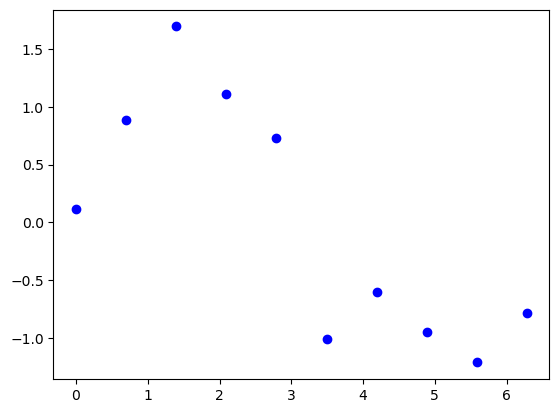

In [4]:
y = make_data_by_sin_gaussian(x)

# データの描画
import matplotlib.pyplot as plt
plt.plot(x,y, "ob")

# sinの描画
#n_tr = 100
#x = np.linspace(0., np.pi*2., n_tr)
#plt.plot(x, np.sin(x))

(注)


ノイズの部分
```python
e = [random.gauss(0, 0.2) for i in range(len(y))]
```
は、numpyの乱数発生関数
```python
e = np.random.randn(len(x))*0.2
```
でもよい。こちらの方が繰り返し記述がない分、シンプルで高速である。（演習として使ってみてほしい。）


In [22]:
y

array([-0.48221898,  1.10002047,  0.99607228,  1.8557235 ,  0.12117253,
       -0.85154843, -0.14321635, -0.68997788, -1.05405243, -0.1684426 ])

## べき多項式関数近似

データに潜む原理から、べき的な振る舞いを示しているものだと想定し、べき関数での近似を行ってみる。つまり、

$$
 y(x, {\bf w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^{M} w_j x^j
$$

置き、トレーニングデータ$\{(t_n, x_n)\}$, $n=1,\cdots, N$を使って、係数${\bf w} = (w_0,\ w_2,\ \cdots,\ w_M)$を
2乗誤差

$$
E({\bf w}) = \frac{1}{2} \sum_{n=1}^N \{y(x_n,{\bf w}) - t_n\}^2
$$

を最小にするよう${\bf w}$を決める。

このことを最小2乗法と呼ぶ。 (参考図 https://imagingsolution.net/math/least-square-method/ )

**pythonのライブラリscikit-learn** にあるlinear_modelを用いてみる




### 線形近似

#### サンプルデータの作成

In [23]:
# トレーニングデータの数 (上で行っていれば必要ない)
n_tr = 20
x = np.linspace(0., np.pi*2., n_tr)

# データの作成
y = make_data_by_sin_gaussian(x) #　データ


#### scikit-learnのlinear_modelを利用

【準備】

- x軸のデータからy軸のデータを「推定」(予測)するという意味で、それぞれ「説明変数」（特徴量とも呼ぶ）、「目的変数」という言葉を使う。
- linear_modelに適用するには、データの1レコードは1行にする必要がある


In [24]:
# linear_modelへ適用するために
# numpyの配列形状を変更

print(x)
print(x.reshape(-1,1)) # それぞれのデータを各行に（つまり「転置」）

[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
[[0.        ]
 [0.33069396]
 [0.66138793]
 [0.99208189]
 [1.32277585]
 [1.65346982]
 [1.98416378]
 [2.31485774]
 [2.64555171]
 [2.97624567]
 [3.30693964]
 [3.6376336 ]
 [3.96832756]
 [4.29902153]
 [4.62971549]
 [4.96040945]
 [5.29110342]
 [5.62179738]
 [5.95249134]
 [6.28318531]]


In [25]:
from sklearn import linear_model as lm
# モデル（オブジェクト）を作成
rlf = lm.LinearRegression()

x_tr = x.reshape(-1,1)
y_tr = y.reshape(-1,1)

#フィッティング (データは縦ベクトルとして与える必要がある)
rlf.fit(x_tr, y_tr)

# 一次の係数の表示
print(rlf.coef_)
# 切片の表示
print(rlf.intercept_)


[[-0.22370028]]
[0.58182455]


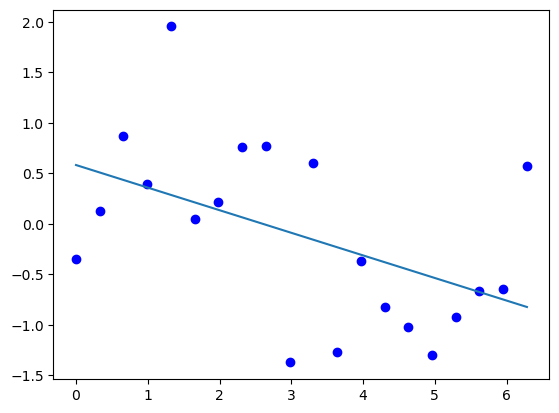

In [26]:
# 直線をデータと合わせて表示

# 直線なので(x0,y0) - (x1, y1) を引くために、[x0,x1]を用意し、[y0,y1]を作成
x_fit = np.array([0, np.pi*2])
y_fit = rlf.predict(x_fit.reshape(-1,1))

plt.plot(x_tr,y, 'ob')
plt.plot(x_fit, y_fit)

### べき多項式近似

scikit-learnにはべき多項式近似（非線形関数近似）のモジュール（モデル）はない（たぶん）！

そこでlinear_modelを応用してべき多項式近似を行ってみる。

まずは、べき関数へのフィッティングをlinear_modelで行うために、$x$の値に対する各べきの値$x^1,\ x^2,\ x^3,\ \cdots,\ x^n$を行として並べた行列(Vandermonde行列)を作成しておく。
(sklearnにあるPolynomialFeaturesを用いることもできる。[参考ページ](https://qiita.com/orangeBeens/items/0f8e3b326ddf6f786754))

(注)データ分析に慣れている人向け説明：

$n$個の説明変数に対する係数$\{w_i\}$を線形重回帰(multiple linear regression)によって決めるということに相当する。

このことの必要性を理解するために、最初に[社会的データの重回帰分析](multiple_regression.html)について説明する。


In [27]:

# 説明変数の作成 (x, x^2, ...x^m) 行列
m=5 # フィッティング関数の次数
power_matrix_x = np.vander(x, m+1)

In [28]:
# show the vander matrix
power_matrix_x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.95486203e-03, 1.19592810e-02, 3.61641950e-02, 1.09358498e-01,
        3.30693964e-01, 1.00000000e+00],
       [1.26555585e-01, 1.91348496e-01, 2.89313560e-01, 4.37433990e-01,
        6.61387927e-01, 1.00000000e+00],
       [9.61031473e-01, 9.68701759e-01, 9.76433265e-01, 9.84226478e-01,
        9.92081891e-01, 1.00000000e+00],
       [4.04977872e+00, 3.06157593e+00, 2.31450848e+00, 1.74973596e+00,
        1.32277585e+00, 1.00000000e+00],
       [1.23589438e+01, 7.47455061e+00, 4.52052437e+00, 2.73396244e+00,
        1.65346982e+00, 1.00000000e+00],
       [3.07530071e+01, 1.54992281e+01, 7.81146612e+00, 3.93690591e+00,
        1.98416378e+00, 1.00000000e+00],
       [6.64693661e+01, 2.87142336e+01, 1.24043189e+01, 5.35856638e+00,
        2.31485774e+00, 1.00000000e+00],
       [1.29592919e+02, 4.89852149e+01, 1.85160678e+01, 6.99894384e+00,
        2.64555171e+00, 

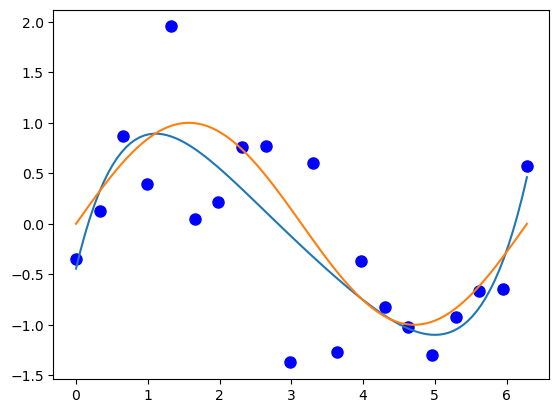

In [29]:
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# 関数フィッティング
lrp = lm.LinearRegression()
lrp.fit(power_matrix_x, y) # 以上が学習（フィッティングにより係数を決定）
# 予測 (下の実線)
x_lrp = np.linspace(0., np.pi*2.0, 100)   # 検証用のxのデータ
y_lrp = lrp.predict(np.vander(x_lrp, m+1)) # using learned machine, predict y for x

# データの描画
plt.plot(x_tr, y, "ob", ms=8)
# 近似曲線の描画
plt.plot(x_lrp, y_lrp)
# 基にしたsin(x)をプロット
plt.plot(x_lrp, np.sin(x_lrp))

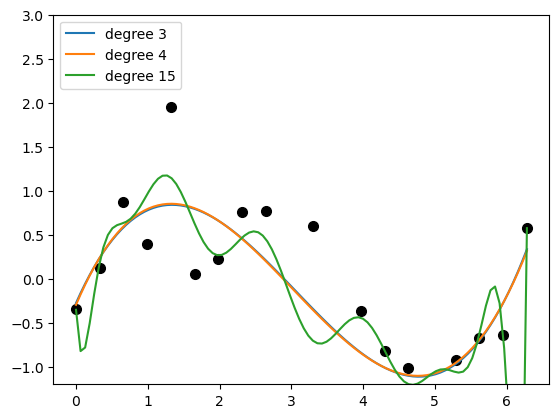

In [32]:
# 高次のべき多項式による近似
plt.plot(x, y , 'ok', ms=7) # データの描画
for deg in [3,4, 15]: # 複数の次数で近似
    lrp.fit(np.vander(x, deg +1), y)
    y_lrp = lrp.predict(np.vander(x_lrp, deg+1))
    plt.plot(x_lrp, y_lrp,
            label='degree ' + str(deg))
    plt.legend(loc=2)
    plt.ylim(-1.2, 3.0)
    # モデルの係数表示
    #print('  '. join(['%.2f' % c for c in lrp.coef_]))


自然科学では、対象となる系のふるまいの裏にはあるシンプルな原理が存在していると考える。今の場合、その原理に基づけば系は$\sin x$のようにふるまうと想定されるとする。

自然科学の場合は、その原理に基づいて$\sin x$に振幅、位相を未定係数としておいて、その係数をデータから推定することを行う。

一方、原理がまったくわからない、あるいは、背後にある要素・要因が複雑で本質的に単純な原理で説明できないような対象の場合はどうであろうか。**適用範囲を適切に設定すれば**、べき関数であっても十分近似でき「予測」には有用であるといえる。



## 補足  (過学習について)

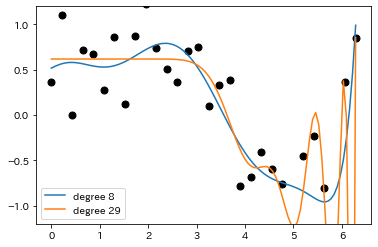

In [88]:
# もっと高次に
plt.plot(x, y , 'ok', ms=7) # データの描画
for deg in [8,n_tr-1]: # 複数の次数で近似
    lrp.fit(np.vander(x, deg +1), y)
    y_lrp = lrp.predict(np.vander(x_lrp, deg+1))
    plt.plot(x_lrp, y_lrp,
            label='degree ' + str(deg))
    plt.legend()
    plt.ylim(-1.2, 1.2)

べき関数の次数をデータの数と同じにすれば、原理的には全部のデータ点を通るようにフィッティングできる。が、それでよいか？

このようなフィッティングを「過学習」と呼ぶ。

過学習を防ぐために、高次の項を不必要に重視しないよう重みをつけたり次数を削減したりする方法が考えられている。Ridge回帰、Lasso回帰について次回学習する。

[関数フィッティングその２](function_fitting2.html)

最後のフィッティングの係数は、学習器のプロパティ（lrp.coef_)に入っている。
下のように、高次(4～5次以上)の係数の絶対値が大きな値を取っていることに注意しよう。

次の節での、Ridge回帰等では、大きな係数を抑制するメカニズムを導入することになる。

In [15]:
lrp.coef_

array([ 5.48260586e-03, -1.51855220e-01,  1.76568595e+00, -1.12026688e+01,
        4.21742812e+01, -9.57789028e+01,  1.27057293e+02, -8.95749940e+01,
        2.63061958e+01,  0.00000000e+00])

## 演習課題2 (Exercise 2)

- データを$\sin x$にノイズを加えたものから、別のもの（$\sin$以外の関数など）に変えて、フィッティングを試してみなさい。
- データの個数やフィッティング関数のべきを変えて試し、考察しなさい。


初めての人は、先週に引き続き、次のようなことをレポートしてもよい。

- markdown書式の練習
 - 数式の書法(LaTeXの数式文法)など
- 上記のプログラム例に即したpythonの基本文法学習（プログラムソースの読み解き）
 - pythonの変数、配列（リスト）、numpyの変数（データ構造）、関数定義
 - scikit-learnのlinear_modelについて など
- 関数フィッティングについての学習

など

あるいは、序論(第1週)で例示した甲府市の平均気温データの関数フィッティングを行ってみる。
(データ: https://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/PracDataSci/data/temperature_data_kofu.csv )

**(レポートは最終回にまとめて提出してもらいます。）**

## 補足： Mathematical Description to calculate the coefficients of the fitting function

For a given data set $\{(x_n, t_n)\}$, ($n=1,\cdots , N$), assuming a fitting function
$$
f(x) = \sum_{n=1}^M w_m \phi_m (x) = \boldsymbol{w}^T \boldsymbol{\phi}(x),\ \ {\rm where }\ \phi_m (x) = x^{m-1},
$$
we calculate the parameter set $(\{w_n\})$ that minimizes the evaluation function
$$
E_D = \frac{1}{2} \sum_{n=1}^M (w_m \phi_m(x_n) - t_n)^2.
$$
The condition that $E_D$ takes an extreme value is
$$
\frac{\partial E_D}{\partial w_m} = 0,\quad (m=1,\cdots, M),
$$
which can be written as
$$
\sum_{n=1}^N \left( \sum_{m'=1}^M w_{m'}\phi_{m'}(x_n) - t_n \right)\phi_m(x_n) = 0.
$$
By interchanging the summations, we get
$$
\sum_{m'=1}^M w_{m'}\left(\sum_{n=1}^N \phi_{m'}(x_n)\phi_m (x_n) \right) - \sum_{n=1}^N t_n\phi_m (x_n) =0
$$

Introducing an $N\times M$ matrix, called the design matrix (計画行列)
$$
\Phi = \left(
\begin{array}{cccc}
 \phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_M (x_1) \\
 \phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_M (x_2) \\
     \vdots & \vdots & & \vdots \\
 \phi_1(x_N) & \phi_2(x_N) & \cdots & \phi_M (x_N) 
\end{array}
\right),
$$
we have the vector representation of the above equation
$$
\sum_{m'=1}^M w_{m'}\boldsymbol{w}^T (\boldsymbol{\Phi}^T\boldsymbol{\Phi})_{m' m} - \sum_{n=1}^N t_n\phi_m (x_n) =0,
$$
which is simply written as
$$
\boldsymbol{w}^T (\boldsymbol{\Phi}^T\boldsymbol{\Phi}) - \boldsymbol{t}^T\boldsymbol{\Phi} =0
$$
Assuming the $M\times M$ matrix $\boldsymbol{\Phi}^T\boldsymbol{\Phi}$ has its inverse matrix, we finally get
$$
\boldsymbol{w} = (\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T \boldsymbol{t}
$$

Note that the design matrix is a function of the explanation variable $x$. So we can calculate the least-square solution
$\boldsymbol{w}$ from a data set $\{(x_n, t_n)\}$.


We put both the design matrix (2-d numpy array) and the target values (1-d array) as the arguments of the fitting function. 
For the polynomial fitting, we can use the **vander** function included in numpy to create the design matrix.

中身を見ればわかるが、あるデータ値$x$に対して、べき関数フィッティングの場合、$x^M$, $x^{M-1}$, $\cdots$, $x^1$, $x^0$の値を横に並べ、各データを1行として、$N$個のデータを行として並べたものを与える。(べきの高い方から並ぶ。)

numpy.vander()はデータリストを与えると、これを一気に作ってくれる。

numpy.vander(x, m-1) creates the following array from a explanation variable $x$:
$$
\left(
\begin{array}{ccccc}
 x[0]^{m-1} & x[0]^{m-2} & \cdots & x[0]^{1} & x[0]^0 \\
 x[1]^{m-1} & x[1]^{m-2} & \cdots & x[1]^{1} & x[1]^0 \\
     \vdots & \vdots & \vdots & \vdots &\\
 x[N-1]^{m-1} & x[N-1]^{m-2} & \cdots & x[N-1]^{1} & x[N-1]^0) 
\end{array}
\right).
$$

Ref.: PRML $\S 3.1.1$. See also 「ITエンジニアのための機械学習理論入門」$\S 2.1$ (中井悦司、技術評論社)

In [8]:
# show again the vander matrix created above
power_matrix_x

array([[  0.        ,   0.        ,   0.        ,   1.        ],
       [  0.34026092,   0.48738787,   0.6981317 ,   1.        ],
       [  2.72208739,   1.94955149,   1.3962634 ,   1.        ],
       [  9.18704494,   4.38649084,   2.0943951 ,   1.        ],
       [ 21.77669912,   7.79820595,   2.7925268 ,   1.        ],
       [ 42.53261547,  12.18469679,   3.4906585 ,   1.        ],
       [ 73.49635954,  17.54596338,   4.1887902 ,   1.        ],
       [116.70949686,  23.88200571,   4.88692191,   1.        ],
       [174.21359298,  31.19282379,   5.58505361,   1.        ],
       [248.05021344,  39.4784176 ,   6.28318531,   1.        ]])